In [1]:
import numpy as np
import os

import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import itertools
import astropy.units as u
import astropy.constants as const
import scipy.stats


In [2]:
import sys

from s1s2_0311 import *
from read import *
from recoil_1223 import *

from plot_binned_detection_1d2d_0526 import *

In [64]:

folder_2d ='../nu_capture/nestpy_S1S2/'#'../nestpy_unbinned_unbound_thrd0'# 
nuclei_2d = 'Xenon'
footnote = 'thrd'
pcle = 'F17'

In [65]:
numevent = f"{1e+04:.0e}" #f"{5e+06:.0e}" #str(5002962)#

numevent

'1e+04'

In [66]:
data, eff_num = get_data(folder_2d, pcle, nuclei_2d, numevent, footnote)

In [67]:
E, s1phd, s2phd, rmm, zmm, E_true = get_data_component(data, folder_2d)

In [68]:
df = pd.DataFrame()

In [69]:
df['E[keV]'] = E
df['cS1[phd]'] = s1phd
df['cS2[phd]'] = s2phd
df['Etrue[keV]'] = E_true

In [70]:
min(E_true)

11.529607671895437

In [71]:
df

,E[keV],cS1[phd],cS2[phd],Etrue[keV]
0,69.628932,582.641499,3.020094e+05,72.660142
1,187.888557,1241.010530,9.359789e+05,185.619530
2,448.772193,2633.170521,2.375750e+06,443.949941
3,75.936632,859.832734,2.548250e+05,79.213912
4,60.134099,617.008924,2.221251e+05,61.677037
...,...,...,...,...
9995,302.415563,2044.349369,1.508233e+06,295.087947
9996,1191.421363,6317.139240,6.525541e+06,1159.850618
9997,376.942822,2393.053720,1.935747e+06,371.179490
9998,138.627209,952.905693,6.750634e+05,136.701260


In [72]:
file_name = os.path.join(folder_2d, 'S1S2_'+pcle+'.csv')

In [73]:
file_name

'../nu_capture/nestpy_S1S2/S1S2_F17.csv'

In [74]:
df.to_csv(file_name, index = False)

In [5]:
dataf = pd.read_csv(file_name)

In [6]:
eff_num =len(dataf)

In [7]:
dataf

,E[keV],cS1[phd],cS2[phd],Etrue[keV]
0,0.000000,-1.117419,-0.000001,1.326971
1,0.000000,-0.857414,1842.770536,2.566823
2,0.000000,-0.000001,-0.000001,0.197093
3,0.000000,-0.000001,1405.399869,2.424745
4,4.786444,8.768566,2913.158033,5.591216
...,...,...,...,...
10000001,0.000000,-0.000001,271.425158,0.322005
10000002,3.451963,4.799894,2493.266060,3.239630
10000003,1.971128,3.738179,946.487212,2.553992
10000004,2.684092,2.167788,2403.180124,3.557086


In [8]:
s1 = dataf.loc[(dataf['cS1[phd]'] > 0 ) & (dataf['cS2[phd]']>0) ]['cS1[phd]']
log10s2 = np.log10(dataf.loc[(dataf['cS1[phd]'] > 0 ) & (dataf['cS2[phd]']>0) ]['cS2[phd]'])
Etrue = dataf.loc[(dataf['cS1[phd]'] > 0 ) & (dataf['cS2[phd]']>0) ]['Etrue[keV]']

In [11]:
min(Etrue)

0.2236111424030764

In [ ]:
Er_keV, pdf = read_pcle_pdf(pcle, nuclei, eff_type, recoil_type = '', metallicity_model = 'high', 
                                    ebinding = True, plot = False, corr = corr)

NR
survival


<Quantity 0.05463026 1 / (t yr)>

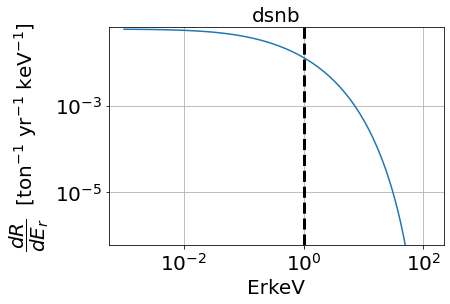

In [14]:
E_threshold_keV = 0
 
eventR, E_endpt, Er_keV, pdf, _, _ = read_pcle_cdf(pcle, nuclei_2d, E_threshold_keV, '', recoil_type = '',
                  read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = 'high', ebind = True, plot_pdf = True, corr = '')
eventR

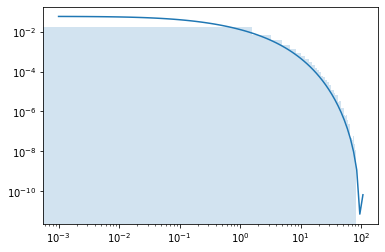

In [16]:
counts, bins = np.histogram(dataf['Etrue[keV]'], 50)
plt.bar(bins[:-1], counts/len(dataf) * eventR.value, np.diff(bins), alpha = 0.2)
plt.plot(Er_keV, pdf
        )
plt.xscale('log')
plt.yscale('log')

In [27]:
Er_keV

array([  1.06937,   1.20356,   1.35459,   1.52458,   1.7159 ,   1.93122,
         2.17357,   2.44633,   2.75332,   3.09883,   3.48769,   3.92536,
         4.41795,   4.97235,   5.59632,   6.2986 ,   7.089  ,   7.97859,
         8.97981,  10.10668,  11.37495,  12.80238,  14.40893,  16.21709,
        18.25215,  20.54259,  23.12045,  26.02181,  29.28725,  32.96247,
        37.09889,  41.75438,  46.99408,  52.89131,  59.52857,  66.99873,
        75.40631,  84.86895,  95.51904, 107.5056 ])

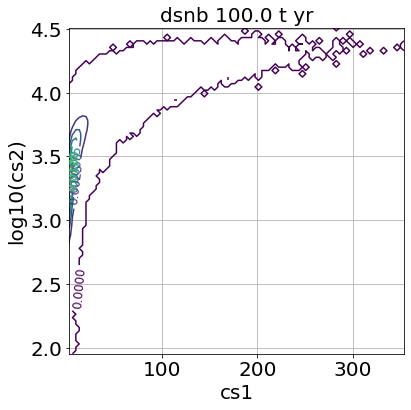

In [30]:
binnumberx, binnumbery =100,100

DT = 100*u.tonne*u.yr
fig, ax= plt.subplots(figsize = (6,6))

_,xbins, ybins= np.histogram2d(s1, log10s2)

counts,xbins, ybins= np.histogram2d(s1, log10s2, bins =[binnumberx, binnumbery]
#                                   , range = [[20, np.ceil(max(xbins))], [3.6, np.ceil(max(ybins))]]
                                   )
counts_normed = counts/eff_num
counts_pertyr = counts_normed * eventR 
counts_num = counts_pertyr *DT


xbins_centers = (xbins[1:]+xbins[:-1])/2
ybins_centers = (ybins[1:]+ybins[:-1])/2

cp =ax.contour(xbins_centers, ybins_centers, counts_num.T)
ax.clabel(cp, inline=True, fontsize=12)

ax = setup_cdfpdf_ax(ax,pcle + ' '+str(DT), 'cs1', 'log10(cs2)', True, '', 20, 20, 
            vlines = [0], hlines = [0], 
                 xlims = [0,0], ylims = [0,0], log = [0,0])


In [45]:
counts_num_pd = pd.DataFrame(counts_num.T)

In [46]:
counts_num_pd

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000006,1.398624e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
1,0.000006,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
2,0.000025,1.398624e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
3,0.000041,1.398624e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
4,0.000043,6.993120e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.000003,0.000000e+00,0.0,0.0,6.993120e-07,6.993120e-07,0.000000e+00,0.0,0.0
96,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,6.993120e-07,0.0,0.0,0.000000e+00,0.000000e+00,6.993120e-07,0.0,0.0
97,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
98,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0


In [47]:
peak_density = counts_num.max()
peak_density

<Quantity 0.03969085>

In [48]:
peak_index = tuple(np.argwhere(counts_num == peak_density)[0])
peak_index

(1, 59)

In [49]:
counts_num_pd = pd.DataFrame(counts_num)
counts_num_pd.iat[peak_index]

0.03969085018628322

In [50]:
tot_s1bins, tot_s2bins = counts_num_pd.shape
tot_s1bins, tot_s2bins

(100, 100)

In [51]:
sum(counts_num_pd.to_numpy().flatten()) 

5.620285785969778

In [56]:
start_idc = peak_index#(60,50) # 
exceed_num_thrd = 1.

start at (1, 59) 0.2577468159849671 

start at (1, 59) 0.4833126931628729 

start at (1, 59) 0.7049043803446786 

start at (1, 59) 0.9197665883196446 

start at (1, 59) 1.131551823571957 



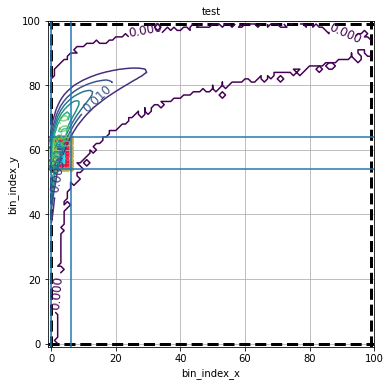

In [57]:
summation, (xmin, xmax), (ymin, ymax) = get_grid_index(counts_num_pd,start_idc, exceed_num_thrd, 
                                                       plot=True, plot_contour = True,print_check = False, plot_maxDFsize =10001)

In [58]:
print(sum(counts_num_pd.loc[xmin: xmax, ymin: ymax].to_numpy().flatten()), summation,
     (xmin, xmax), (ymin, ymax), np.diff((xmin, xmax))*np.diff((ymin, ymax)))

#counts_num_pd.loc[xmin: xmax, ymin: ymax]
xbins_centers[xmin: xmax], ybins_centers[ymin: ymax]

1.1315518235719568 1.131551823571957 (0, 6) (54, 64) [60]


(array([ 3.14895537,  7.38768701, 11.62641866, 15.8651503 , 20.10388194,
        24.34261359]),
 array([3.3910494 , 3.41715032, 3.44325125, 3.46935217, 3.49545309,
        3.52155401, 3.54765493, 3.57375586, 3.59985678, 3.6259577 ]))

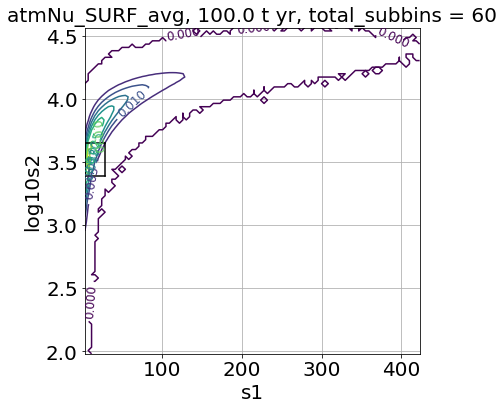

In [59]:
fig, ax = plt.subplots(figsize = (6,6))
total_subbins = np.diff((xmin, xmax))*np.diff((ymin, ymax))[0]
ax = setup_cdfpdf_ax(ax,pcle+', '+str(DT)+', total_subbins = '+str(int(total_subbins)), 's1', 'log10s2', True, '', 20, 20, 
                vlines = [0], hlines = [0], 
                     xlims = [0,0], ylims = [0,0], log = [0,0])

cp =ax.contour(xbins_centers, ybins_centers, counts_num.T)
ax.clabel(cp, inline=True, fontsize=12)
ax.scatter([xbins_centers[start_idc[0]]], [ybins_centers[start_idc[1]]])

ax.plot([xbins_centers[xmin], xbins_centers[xmin]], [ybins_centers[ymin], ybins_centers[ymax]], color = 'black')
ax.plot([xbins_centers[xmax], xbins_centers[xmax]], [ybins_centers[ymin], ybins_centers[ymax]], color = 'black')
ax.plot([xbins_centers[xmin], xbins_centers[xmax]], [ybins_centers[ymin], ybins_centers[ymin]], color = 'black')
ax.plot([xbins_centers[xmin], xbins_centers[xmax]], [ybins_centers[ymax], ybins_centers[ymax]], color = 'black')


# TEST EXAMPLE

In [3]:
N = 16
test_arr = [[random.random() for i in range(N)] for j in range(N)]
test_df = pd.DataFrame(test_arr)
test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.629841,0.271959,0.930468,0.830408,0.229552,0.301953,0.949703,0.973384,0.591360,0.803560,0.521185,0.654780,0.997397,0.748764,0.752572,0.831374
1,0.300715,0.060128,0.714713,0.513394,0.206821,0.148100,0.771740,0.259056,0.390602,0.113677,0.656241,0.296383,0.477430,0.130373,0.936611,0.888897
2,0.472428,0.236047,0.041870,0.666633,0.442006,0.694295,0.991736,0.974574,0.512320,0.645423,0.981179,0.513656,0.571924,0.075580,0.625564,0.044443
3,0.916061,0.215857,0.486534,0.795705,0.575686,0.897886,0.207333,0.110702,0.784256,0.849264,0.098639,0.908588,0.649100,0.402318,0.068989,0.863329
4,0.446750,0.588699,0.970719,0.440503,0.816993,0.766565,0.403790,0.073335,0.850665,0.943222,0.674332,0.760947,0.702660,0.852877,0.768827,0.270820
5,0.103369,0.197168,0.573887,0.030774,0.444000,0.047644,0.247198,0.430802,0.790592,0.428334,0.715072,0.488540,0.439765,0.423493,0.521869,0.993513
6,0.715454,0.400109,0.831936,0.211247,0.215765,0.786783,0.192206,0.847489,0.121744,0.947669,0.326421,0.207792,0.712502,0.205450,0.102283,0.451204
7,0.786175,0.213341,0.645898,0.827089,0.447296,0.324366,0.970724,0.073180,0.114167,0.289141,0.778172,0.674577,0.997229,0.620430,0.361917,0.062541
8,0.309837,0.816068,0.964049,0.884076,0.778919,0.971195,0.763659,0.845579,0.700663,0.222162,0.012025,0.890618,0.061935,0.829162,0.398405,0.198833
9,0.856034,0.669102,0.586891,0.484476,0.491917,0.452106,0.251516,0.976745,0.149438,0.746272,0.533510,0.138063,0.405025,0.706857,0.039995,0.985822


all_index =  [(5, 4), (5, 5), (5, 6), (6, 4), (6, 5), (6, 6), (7, 4), (7, 5), (7, 6)] len =  9 
valid_all_index =  [(5, 4), (5, 5), (5, 6), (6, 4), (6, 5), (6, 6), (7, 4), (7, 5), (7, 6)] len =  9 
previous_index =  [(6, 5)] len =  1 
new_index =  [(7, 4), (5, 5), (5, 4), (6, 4), (7, 6), (5, 6), (6, 6), (7, 5)] len =  8 
valid_new_index =  [(7, 4), (5, 5), (5, 4), (6, 4), (7, 6), (5, 6), (6, 6), (7, 5)] len =  8
start at (6, 5) 3.6759814592061986 

all_index =  [(4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7)] len =  25 
valid_all_index =  [(4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7)] len =  25 
previous_index =  [(5, 4), (5, 5), (5, 6), (6, 4), (6, 5), (6, 6), (7, 4), (7, 5), (7, 6)] 

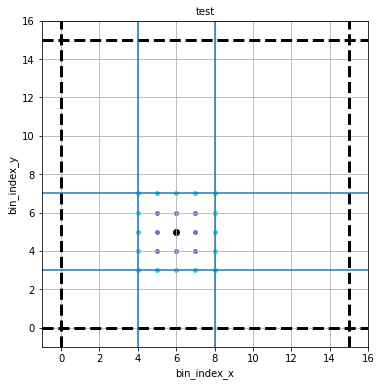

In [61]:
summation_test, (xmin_test, xmax_test), (ymin_test, ymax_test) = get_grid_index(test_df, (6,5), 10, plot=True, print_check = True, plot_maxDFsize = 300)

In [63]:
total_subbins_test = np.diff((xmin_test, xmax_test))*np.diff((ymin_test, ymax_test))
summation_test, (xmin_test, xmax_test), (ymin_test, ymax_test), total_subbins_test

(12.841176288123027, (4, 8), (3, 7), array([16]))